# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

# Read in `data/weedprices01012015.csv`

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import glob
import matplotlib.ticker as ticker

In [2]:
df=pd.read_csv("data/weedprices01012015.csv")

In [3]:
df.shape

(51, 7)

In [4]:
df.dtypes

State      object
HighQ     float64
HighQN      int64
MedQ      float64
MedQN       int64
LowQ       object
LowQN       int64
dtype: object

In [5]:
df.head()

State   HighQ  HighQN    MedQ  MedQN                           LowQ  \
0     Alabama  337.54    1539  208.24   1463  I feel bad for these guys -->   
1      Alaska  303.02     350  270.45    475  I feel bad for these guys -->   
2     Arizona  298.51    2638  209.43   2426  I feel bad for these guys -->   
3    Arkansas  341.68     846  207.20    836  I feel bad for these guys -->   
4  California  243.96   16512  189.35  19151  I feel bad for these guys -->   

   LowQN  
0    182  
1     37  
2    306  
3    145  
4   1096

## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [6]:
df["LowQ"].replace("I feel bad for these guys -->",np.nan,inplace=True)

In [7]:
df.head()

State   HighQ  HighQN    MedQ  MedQN  LowQ  LowQN
0     Alabama  337.54    1539  208.24   1463   NaN    182
1      Alaska  303.02     350  270.45    475   NaN     37
2     Arizona  298.51    2638  209.43   2426   NaN    306
3    Arkansas  341.68     846  207.20    836   NaN    145
4  California  243.96   16512  189.35  19151   NaN   1096

## Graph the top 10 least expensive states for high quality marijuana

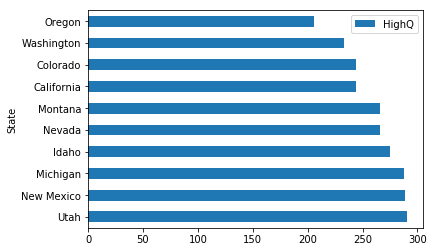

In [8]:
df.sort_values("HighQ", ascending=False).tail(10).plot(x="State", y="HighQ", kind="barh")

## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

In [9]:
least_expensive = df.sort_values("HighQ", ascending=True).head()

In [10]:
most_expensive = df.sort_values("HighQ", ascending=False).head()

In [11]:
df_combined = pd.concat([least_expensive, most_expensive], ignore_index=True) 

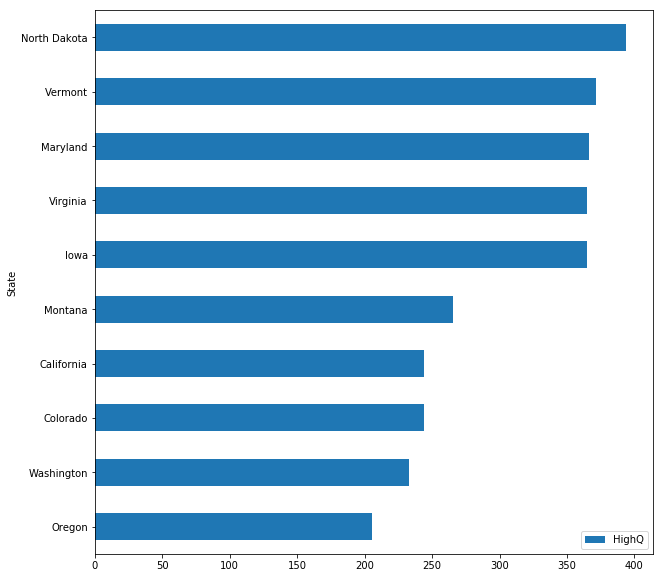

In [12]:
df_combined.sort_values(by="HighQ").plot(x="State", y="HighQ", kind="barh", figsize=(10,10))

## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

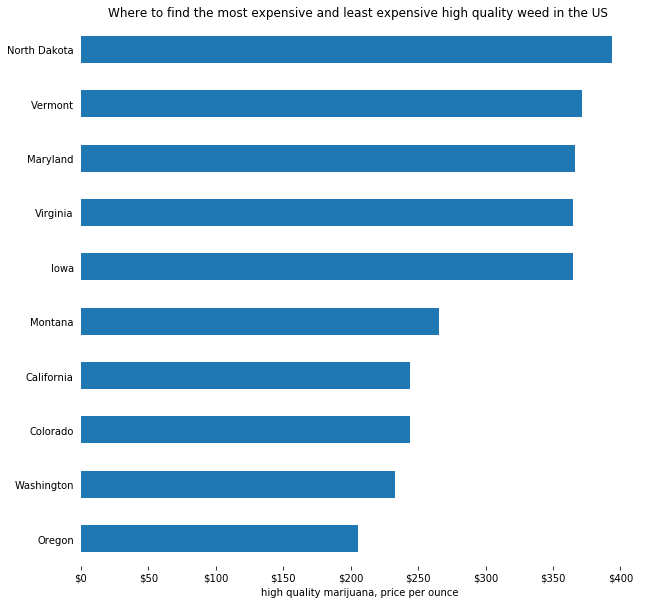

In [13]:
ax = df_combined.sort_values(by="HighQ").plot(x="State", y="HighQ", kind="barh", figsize=(10,10),legend=False)
ax.set_title("Where to find the most expensive and least expensive high quality weed in the US ")
ax.set_xlabel("high quality marijuana, price per ounce")
ax.set_ylabel("")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.set_ticks_position("none")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:.0f}"))

# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [14]:
ls data/

today/                  weedprices11022015.csv* weedprices21012015.csv*
weedprices01012014.csv* weedprices11032014.csv* weedprices21022014.csv*
weedprices01012015.csv* weedprices11042014.csv* weedprices21032014.csv*
weedprices01022014.csv* weedprices11052014.csv* weedprices21042014.csv*
weedprices01022015.csv* weedprices11052015.csv* weedprices21052014.csv*
weedprices01032014.csv* weedprices11062014.csv* weedprices21052015.csv*
weedprices01042014.csv* weedprices11062015.csv* weedprices21062014.csv*
weedprices01052014.csv* weedprices11072014.csv* weedprices21062015.csv*
weedprices01062014.csv* weedprices11072015.csv* weedprices21072014.csv*
weedprices01062015.csv* weedprices11082014.csv* weedprices21072015.csv*
weedprices01072014.csv* weedprices11092014.csv* weedprices21082014.csv*
weedprices01072015.csv* weedprices11102014.csv* weedprices21092014.csv*
weedprices01082014.csv* weedprices11112014.csv* weedprices21102014.csv*
weedprices01092014.csv* weedprices11122014.csv* weedprices211120

In [15]:
#use glob to get a list of files
files = glob.glob("data/*.csv")

In [16]:
len(files)

491

## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

In [17]:
#use a list comprehension to get a list of dataframes
price_dfs = [pd.read_csv(file) for file in files]

In [18]:
len(price_dfs)

491

## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [19]:
#Let's look at our first dataframe
price_dfs[0][:2]

State    HighQ  HighQN     MedQ  MedQN     LowQ  LowQN
0  Alabama  $339.06    1042  $198.64    933  $149.49    123
1   Alaska  $288.75     252   $260.6    297  $388.58     26

In [20]:
#Let's look at our last dataframe
price_dfs[-1][:2]

State   HighQ  HighQN    MedQ  MedQN                           LowQ  \
0  Alabama  337.54    1539  208.15   1460  I feel bad for these guys -->   
1   Alaska  303.02     350  270.45    475  I feel bad for these guys -->   

   LowQN  
0    182  
1     37

## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

In [21]:
#use zip to loop through as many lists as you need to at the same time
#it's going to go through every single one of our files and dataframes
#and make a new column in every dataframe called filename with the file's name

for df,file in zip (price_dfs, files):
    df["filename"] = file
    

In [22]:
price_dfs[0][:2]

State    HighQ  HighQN     MedQ  MedQN     LowQ  LowQN  \
0  Alabama  $339.06    1042  $198.64    933  $149.49    123   
1   Alaska  $288.75     252   $260.6    297  $388.58     26   

                      filename  
0  data/weedprices01012014.csv  
1  data/weedprices01012014.csv

In [23]:
price_dfs[-1].tail()

State   HighQ  HighQN    MedQ  MedQN  \
46       Virginia  364.98    3513  293.12   3079   
47     Washington  233.05    3337  189.92   3562   
48  West Virginia  359.35     551  224.03    545   
49      Wisconsin  350.52    2244  272.71   2221   
50        Wyoming  322.27     131  351.86    197   

                             LowQ  LowQN                     filename  
46  I feel bad for these guys -->    284  data/weedprices31122014.csv  
47  I feel bad for these guys -->    160  data/weedprices31122014.csv  
48  I feel bad for these guys -->     60  data/weedprices31122014.csv  
49  I feel bad for these guys -->    167  data/weedprices31122014.csv  
50  I feel bad for these guys -->     12  data/weedprices31122014.csv

## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

In [24]:
combined_dfs= pd.concat(price_dfs,ignore_index=True)

In [25]:
combined_dfs.shape

(24990, 8)

In [26]:
combined_dfs["LowQ"].replace("I feel bad for these guys -->",np.nan,inplace=True)

## Pull out the day, month and year from each filename

Do **not** store it back yet!

In [27]:
#pull out the dd, mm, yy separately
#if you capture more than one thing, pandas will return a DataFrame
combined_dfs["filename"].astype(str).str.extract("data/weedprices(\d\d)(\d\d)(\d\d\d\d)")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


0   1     2
0      01  01  2014
1      01  01  2014
2      01  01  2014
3      01  01  2014
4      01  01  2014
5      01  01  2014
6      01  01  2014
7      01  01  2014
8      01  01  2014
9      01  01  2014
10     01  01  2014
11     01  01  2014
12     01  01  2014
13     01  01  2014
14     01  01  2014
15     01  01  2014
16     01  01  2014
17     01  01  2014
18     01  01  2014
19     01  01  2014
20     01  01  2014
21     01  01  2014
22     01  01  2014
23     01  01  2014
24     01  01  2014
25     01  01  2014
26     01  01  2014
27     01  01  2014
28     01  01  2014
29     01  01  2014
...    ..  ..   ...
24960  31  12  2014
24961  31  12  2014
24962  31  12  2014
24963  31  12  2014
24964  31  12  2014
24965  31  12  2014
24966  31  12  2014
24967  31  12  2014
24968  31  12  2014
24969  31  12  2014
24970  31  12  2014
24971  31  12  2014
24972  31  12  2014
24973  31  12  2014
24974  31  12  2014
24975  31  12  2014
24976  31  12  2014
24977  31  12  2014
24978  31  12  2014
24979  31  12  2014
24980  31  12  2014
24981  31  12  2014
24982  31  12  2014
24983  31  12  2014
24984  31  12  2014
24985  31  12  2014
24986  31  12  2014
24987  31  12  2014
24988  31  12  2014
24989  31  12  2014

[24990 rows x 3 columns]

## Okay, now add all three columns back at once

You should rename the columns first!

In [28]:
#add them each back in as separate columns
dates_df =combined_dfs["filename"].astype(str).str.extract("data/weedprices(\d\d)(\d\d)(\d\d\d\d)").rename(columns={0:"day",1:"month", 2:"year"})

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [29]:
#renamed columns
dates_df.head()

day month  year
0  01    01  2014
1  01    01  2014
2  01    01  2014
3  01    01  2014
4  01    01  2014

In [30]:
#combine date stamp into one column
dates_df["date"]= dates_df["day"] + "/" + dates_df["month"] + "/" + dates_df["year"]
dates_df.head()

day month  year        date
0  01    01  2014  01/01/2014
1  01    01  2014  01/01/2014
2  01    01  2014  01/01/2014
3  01    01  2014  01/01/2014
4  01    01  2014  01/01/2014

In [31]:
#use axis=1 to tell pandas to stack side by side using concat
final_df = pd.concat([dates_df, combined_dfs], axis=1)

In [32]:
final_df.head()

day month  year        date       State    HighQ HighQN     MedQ  MedQN  \
0  01    01  2014  01/01/2014     Alabama  $339.06   1042  $198.64    933   
1  01    01  2014  01/01/2014      Alaska  $288.75    252   $260.6    297   
2  01    01  2014  01/01/2014     Arizona  $303.31   1941  $209.35   1625   
3  01    01  2014  01/01/2014    Arkansas  $361.85    576  $185.62    544   
4  01    01  2014  01/01/2014  California  $248.78  12096  $193.56  12812   

      LowQ LowQN                     filename  
0  $149.49   123  data/weedprices01012014.csv  
1  $388.58    26  data/weedprices01012014.csv  
2  $189.45   222  data/weedprices01012014.csv  
3  $125.87   112  data/weedprices01012014.csv  
4  $192.92   778  data/weedprices01012014.csv

## Plot the change in marijuana prices in Oregon over time

In [33]:
final_df["HighQ"] = final_df["HighQ"].astype(str).str.replace("$","").astype(float)

In [34]:
final_df.head()

day month  year        date       State   HighQ HighQN     MedQ  MedQN  \
0  01    01  2014  01/01/2014     Alabama  339.06   1042  $198.64    933   
1  01    01  2014  01/01/2014      Alaska  288.75    252   $260.6    297   
2  01    01  2014  01/01/2014     Arizona  303.31   1941  $209.35   1625   
3  01    01  2014  01/01/2014    Arkansas  361.85    576  $185.62    544   
4  01    01  2014  01/01/2014  California  248.78  12096  $193.56  12812   

      LowQ LowQN                     filename  
0  $149.49   123  data/weedprices01012014.csv  
1  $388.58    26  data/weedprices01012014.csv  
2  $189.45   222  data/weedprices01012014.csv  
3  $125.87   112  data/weedprices01012014.csv  
4  $192.92   778  data/weedprices01012014.csv

In [35]:
oregon_df = final_df[final_df["State"] == "Oregon"]
oregon_df.head()

day month  year        date   State   HighQ HighQN     MedQ MedQN  \
31   01    01  2014  01/01/2014  Oregon  213.49   1612  $188.55  1336   
82   01    01  2015  01/01/2015  Oregon  205.80   2179    180.9  2018   
133  01    02  2014  01/02/2014  Oregon  212.44   1677  $188.96  1384   
184  01    02  2015  01/02/2015  Oregon  205.32   2232   180.47  2091   
235  01    03  2014  01/03/2014  Oregon  212.01   1731   $188.5  1450   

        LowQ LowQN                     filename  
31   $175.87    61  data/weedprices01012014.csv  
82       NaN    95  data/weedprices01012015.csv  
133  $174.52    65  data/weedprices01022014.csv  
184      NaN    99  data/weedprices01022015.csv  
235  $169.34    68  data/weedprices01032014.csv

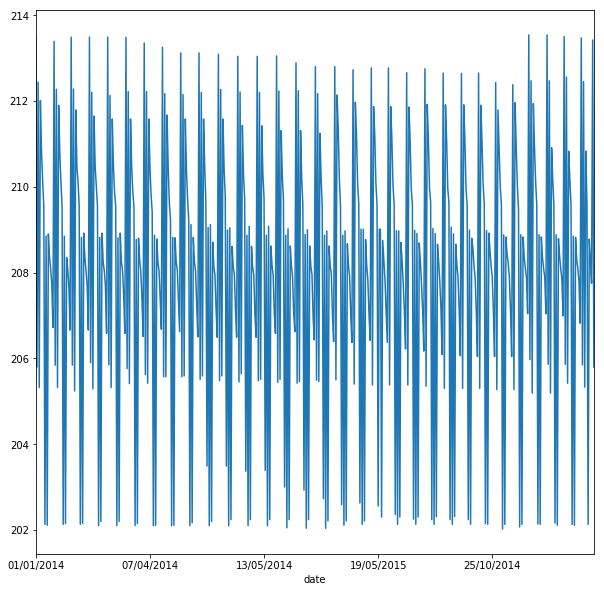

In [37]:
oregon_df.groupby("date")["HighQ"].sum().plot(x="date", y="HighQ", figsize=(10,10))

In [ ]:
#soma converted the date_stamp into datetime ... ???

## Plot the change in marijuana prices in all states over time

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


State
Alabama                 Axes(0.125,0.125;0.775x0.755)
Alaska                  Axes(0.125,0.125;0.775x0.755)
Arizona                 Axes(0.125,0.125;0.775x0.755)
Arkansas                Axes(0.125,0.125;0.775x0.755)
California              Axes(0.125,0.125;0.775x0.755)
Colorado                Axes(0.125,0.125;0.775x0.755)
Connecticut             Axes(0.125,0.125;0.775x0.755)
Delaware                Axes(0.125,0.125;0.775x0.755)
District of Columbia    Axes(0.125,0.125;0.775x0.755)
Florida                 Axes(0.125,0.125;0.775x0.755)
Georgia                 Axes(0.125,0.125;0.775x0.755)
Hawaii                  Axes(0.125,0.125;0.775x0.755)
Idaho                   Axes(0.125,0.125;0.775x0.755)
Illinois                Axes(0.125,0.125;0.775x0.755)
Indiana                 Axes(0.125,0.125;0.775x0.755)
Iowa                    Axes(0.125,0.125;0.775x0.755)
Kansas                  Axes(0.125,0.125;0.775x0.755)
Kentucky                Axes(0.125,0.125;0.775x0.755)
Louisiana             

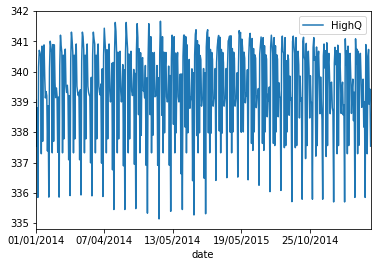

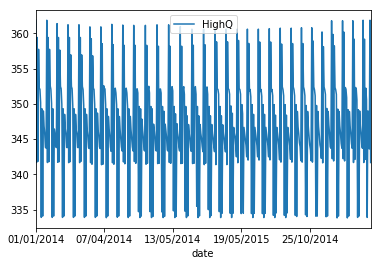

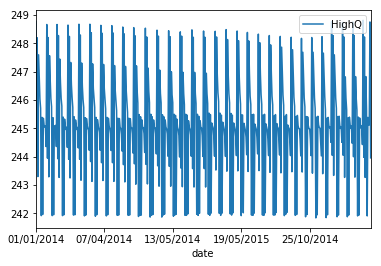

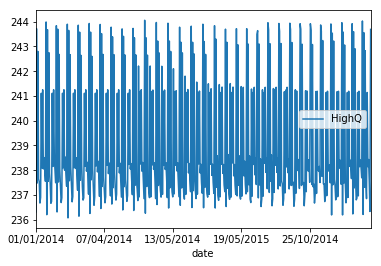

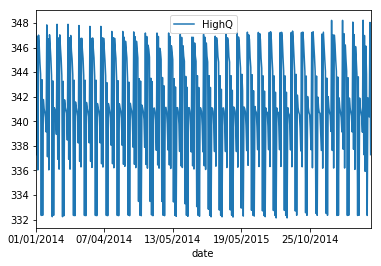

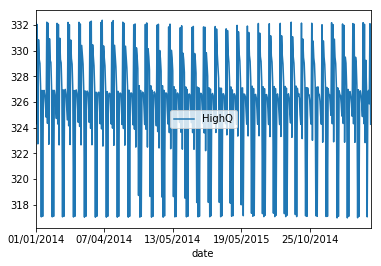

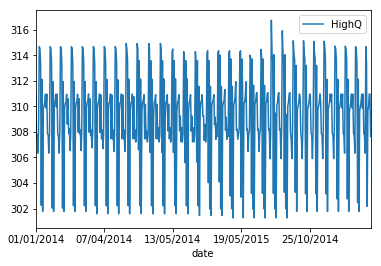

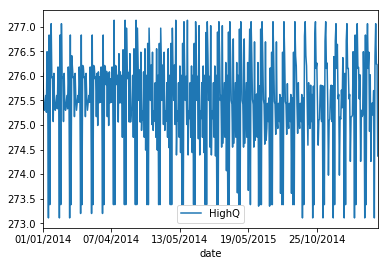

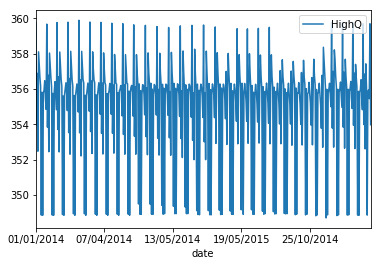

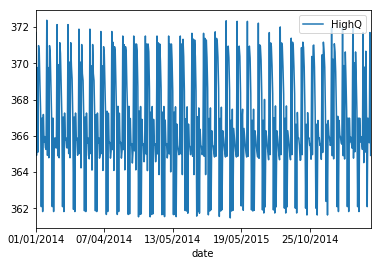

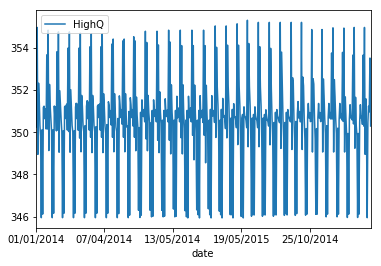

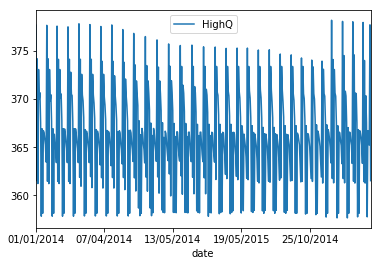

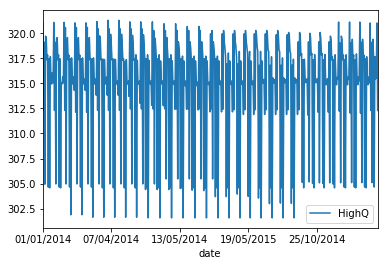

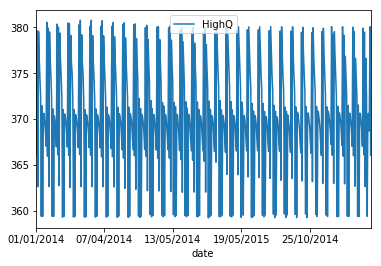

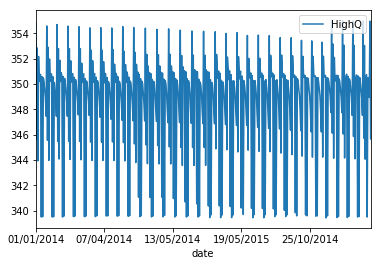

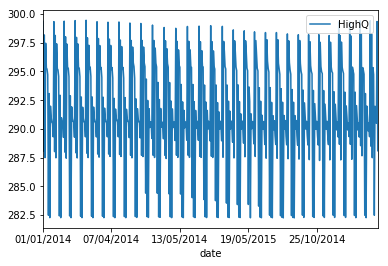

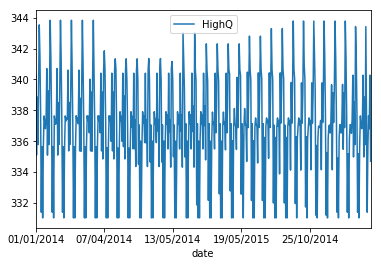

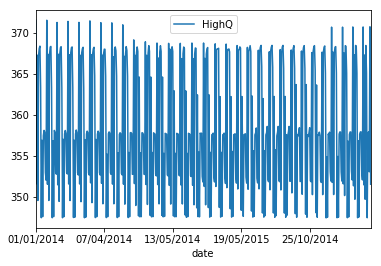

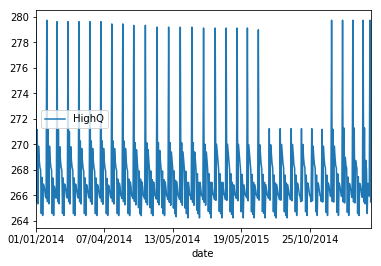

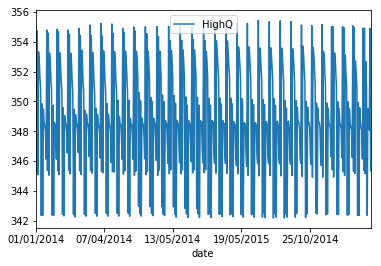

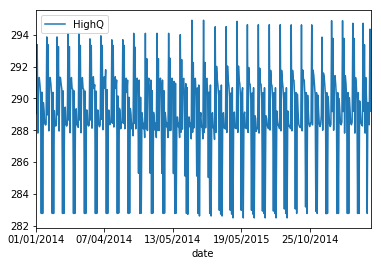

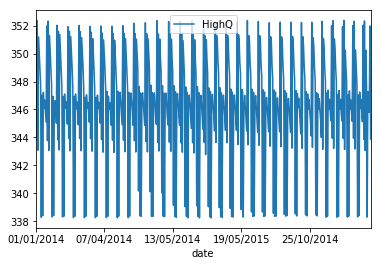

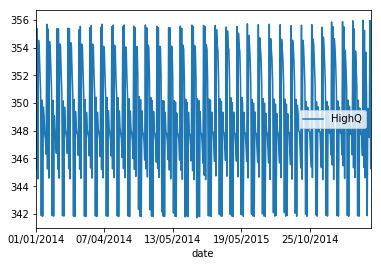

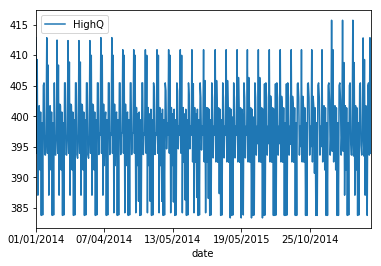

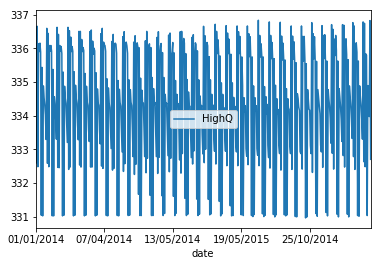

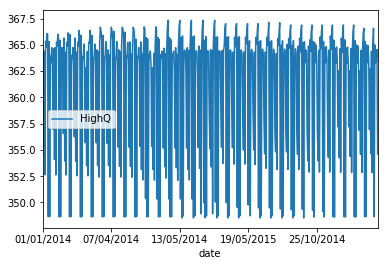

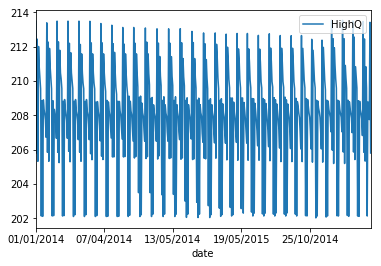

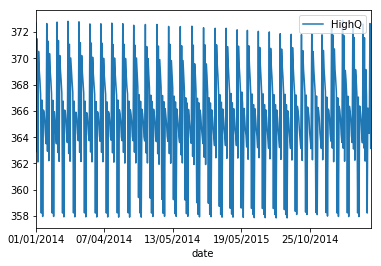

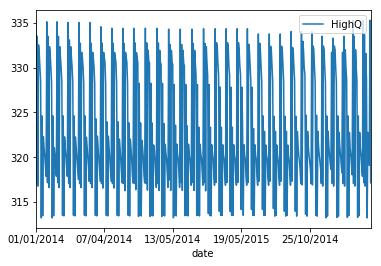

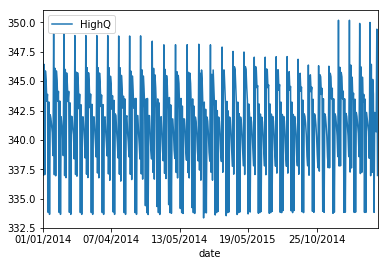

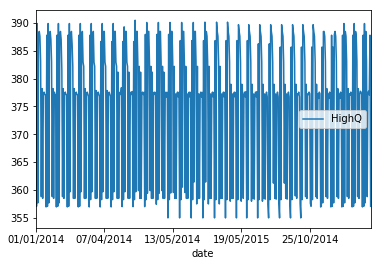

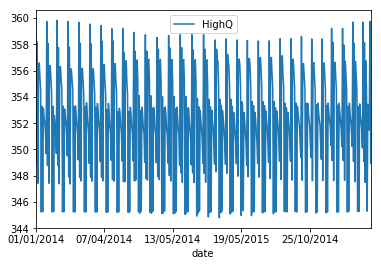

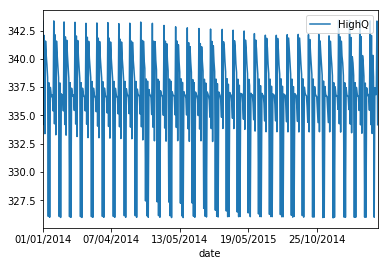

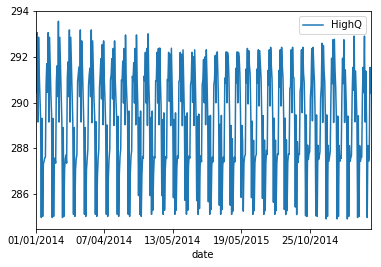

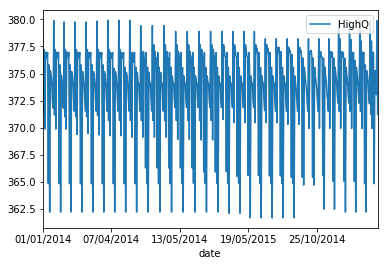

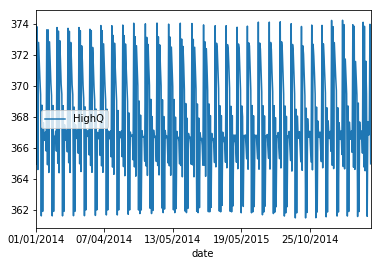

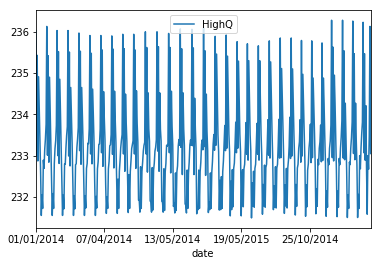

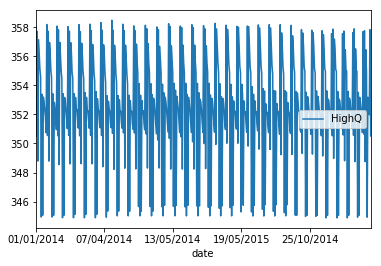

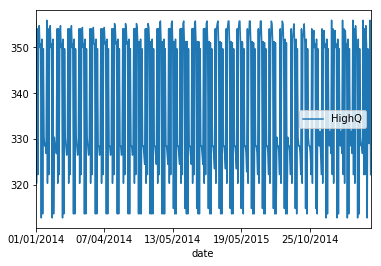

In [38]:
final_df.groupby("State").plot(x="date", y="HighQ")